<a href="https://colab.research.google.com/github/PiotrMaciejKowalski/kurs-analiza-danych-2022/blob/main/Cz%C4%99%C5%9B%C4%87_5_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
arr = np.array([1,2,3,4,5,6,7])

In [ ]:
type(arr)

numpy.ndarray

# Pandas - ramki danych dla Python

Pandas podobnie jak w R jest pakietem dostarczającym (zwłaszcza analitykom danych) narzędzia do pracy z danymi grupowanymi w postaci tabel, w sposób możliwie jak najbardziej to jest (działając we wnętrzu środowiska programistycznego) do tego co dostarczają arkusze Excela. Jednocześnie nie pozwalajacymi na utracenie skuteczności i szybkości jakie zapewniają Python oraz numpy.

Tak jak podstawową strukturą danych numpy as np.ndarray tak w Pandas są pd.Series oraz pd.DataFrame. W odróżnieniu od numpy, dane składowane w Pandas będę w zasadzie zawsze dwuwymiarowe, a poza tym kolumny jak i wierszą mogą, i często są opisane. Przyjrzyjmy się sposobom na tworzenie prostych ramek danych. 

Dodajmy jeszcze, że Jupyter wspiera ramki Pandas w przyjemnym wyświetlaniu ich postaci.

## Pandas Series

Pierwszym krokiem do zrozumienia działania DataFrame jest poznanie Serii danych. Pełna dokumentacja metod może być znaleziona w dokumentacji klasy:

[dokumentacja pandas series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

W prostych słowach Seria danych jest obiektem numpy ndarray, w którym możliwe jest posiadania nazwanego indeksu. Czyli do kolejnych elementów w Serii można odnosić się inaczej niż przez ich miejsce w kolejności.

In [ ]:
x = np.linspace(-10,10,num=5)
x

array([-10.,  -5.,   0.,   5.,  10.])

In [ ]:
seria = pd.Series(x)
seria

0   -10.0
1    -5.0
2     0.0
3     5.0
4    10.0
dtype: float64

Ale można również zadać samodzielnie indeks numerujący

In [ ]:
seria = pd.Series(x, ['A','B','C','D','E'])
seria

A   -10.0
B    -5.0
C     0.0
D     5.0
E    10.0
dtype: float64

In [ ]:
seria['A']

-10.0

Wtedy możemy się odnosić do elementów serii

In [ ]:
seria[['A','C']].values # [] - zewnętrzy to dostęp do serii, 
# natomiast [A,C] to lista (pythona) indeksów które chcemy wybrać

array([-10.,   0.])

In [ ]:
type(seria[['A']]) # podseria)

pandas.core.series.Series

In [ ]:
type(seria['A']) #wartość

numpy.float64

In [ ]:
type(seria.values)

numpy.ndarray

In [ ]:
seria2 = seria[['A','C']]
seria2

A   -10.0
C     0.0
dtype: float64

In [ ]:
seria2['A'] = 7

In [ ]:
seria.values

array([-10.,  -5.,   0.,   5.,  10.])

Bardzo istotnym jest wyczucie, że podstawowym sposobem numerowania jest tutaj numerowanie wzdłuż indeksu. Stanie się to bardzo istotne po przejściu do DataFrame.

Ma to również wpływ na podstawowe operacje wykonywane na tych seriach danych


In [ ]:
x = pd.Series([10,10,10], index = [1,2,3])
y = pd.Series([20,20,20], index = [2,3,4])
x+y

1     NaN
2    30.0
3    30.0
4     NaN
dtype: float64

In [ ]:
np.NaN + 20

nan

Czyli operacje wykonywane są o ile tylko występują pasujące indeksy dla obu serii.

## Pandas DataFrame

Pandas DataFrame jest niczym innym jak obiektem zbudowanym jako zgrupowanie wielu serii danych. Nie tak oczywiście dowolnych. Takich serii, które współdzielą swój indeks. W pandas każda z kolumn jest właśnie osobną serią danych a zgodność indeksu zapewnia o bezpieczeństwie wykonywania operacji matematycznych na danych w kolumnach. 

Utwórzmy sobie prosty przykład ramki

In [ ]:
kwadraty = [(i, i*i) for i in range(10)]

df = pd.DataFrame(data=kwadraty, columns=['Liczba','Jej kwadrat'])
print(df)

   Liczba  Jej kwadrat
0       0            0
1       1            1
2       2            4
3       3            9
4       4           16
5       5           25
6       6           36
7       7           49
8       8           64
9       9           81


Jupyter domyślnie jeszcze lepiej radzi sobie z prezentacją ramek

In [ ]:
df

,Liczba,Jej kwadrat
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [ ]:
df.values.shape

(10, 2)

In [ ]:
type(df['Liczba'])

pandas.core.series.Series

Podstawową formą konstruktora Ramki jest tu zgrupowanie 3 informacji
`
DataFrame(data = dane, index = nazwy_dla_wierszy, columns = nazwy_dla_kolumn)
`

In [ ]:
x = pd.DataFrame(np.zeros((3,4)), index = ['a','b','c'], columns = ['A', 'B', 'C', 'D'])
x

,A,B,C,D
a,0.0,0.0,0.0,0.0
b,0.0,0.0,0.0,0.0
c,0.0,0.0,0.0,0.0


In [ ]:
x['D']['b'] = 7

## Podstawowe właściwości ramek

Przyjrzymy się cechą opisującym nasze opiekty DataFrame

In [ ]:
df.shape

(10, 2)

In [ ]:
df.size

20

In [ ]:
df.values

array([[ 0,  0],
       [ 1,  1],
       [ 2,  4],
       [ 3,  9],
       [ 4, 16],
       [ 5, 25],
       [ 6, 36],
       [ 7, 49],
       [ 8, 64],
       [ 9, 81]])

In [ ]:
type(df.values)

numpy.ndarray

In [ ]:
df.columns

Index(['Liczba', 'Jej kwadrat'], dtype='object')

In [ ]:
x.index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
x.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

## Metody dostępu do kolumn

Omówmy teraz podstawowe sposoby uzyskiwania dostępu do danych. Na początek wybór określonych kolumn

Aby wybrać pojedynczą kolumnę kierujemy się jej nazwą

In [ ]:
df['Jej kwadrat']

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
Name: Jej kwadrat, dtype: int64

Chcąc uzyskać dostęp bezpośrednio do wartości możemy użyć operatora wydobycia z tablicy [].

In [ ]:
df['Jej kwadrat'][3]

9

Warto zauważyć, że typem danych składowanym pod spodem są dane pakiete numpy

In [ ]:
type(df['Jej kwadrat'][3])

numpy.int64

Aby wydobyć więcej niż jedną kolumnę na raz zamiast pojedynczej kolumny przekazujemy w parametrze listę kolumn. W efekcie mylnie wygląda to jakbyś wywoływali specjalny operator [[]]

In [ ]:
df[['Liczba', 'Jej kwadrat']]


,Liczba,Jej kwadrat
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


Często możliwy jest również inny rodzaj dostępu. Jeśli tylko nazwa kolumny jest odpowiednio prosta, możliwym jest odniesienie do niej jak do składowej obiektu DataFrame

In [ ]:
df.Liczba # df['Liczba']

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Liczba, dtype: int64

Sprawa wyraźnie się komplikuje kiedy chcemy uzyskać dostęp nie w oparciu o nazwy kolumn ale w oparciu o numery tychże kolumn. Do realizacji tego stosuje się właściwość nazywaną iloc. Pozwala on tworzyć selektory danych oparte o całkowito-liczbowe indeksy wierszy i kolumn - jak w czystym numpy

In [ ]:
df.iloc[::-1,1] # i - integer <->loc - location

9    81
8    64
7    49
6    36
5    25
4    16
3     9
2     4
1     1
0     0
Name: Jej kwadrat, dtype: int64

In [ ]:
df.iloc[:,1]

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
Name: Jej kwadrat, dtype: int64

Lub wraz z wyborem tylko kilku wierszy

In [ ]:
df.iloc[2:4,0:2]

,Liczba,Jej kwadrat
2,2,4
3,3,9


Dostrzegamy tu również, że w zależności od zadanych parametrów otrzymujemy w odpowiedzi różne obiekty

In [ ]:
print(type(df.iloc[:,1]))
print(type(df.iloc[2:4,0:2]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


## Dostęp dla wierszy

W przypadku gdy wiersze są nazwa można uzyskać do nich dostęp za pomocą ich nazw. Można to uzyskać również za pomocą numerów ich indeksów, które już na pewno posiadają, aby pokazać ich działanie zdefiniujmy też ramkę, która ma opisane wiersze.

In [ ]:
my_data = np.random.randn(4,4)

df2 = pd.DataFrame(my_data,['A','B','C','D'],['E','F','G','H'])
df2

,E,F,G,H
A,-0.061522,0.137938,1.135173,0.742972
B,0.047682,0.772371,0.712371,0.078300
C,-1.483021,0.278963,0.293451,-0.616506
D,1.468332,0.993501,1.767542,-0.101955


In [ ]:
df2.loc['A']

E   -0.061522
F    0.137938
G    1.135173
H    0.742972
Name: A, dtype: float64

Analogicznie uzyskujemy dostęp do większej ilości wierszy

In [ ]:
df2.loc[['A','C']]

,E,F,G,H
A,-0.061522,0.137938,1.135173,0.742972
C,-1.483021,0.278963,0.293451,-0.616506


Dla ramek bez określonych nazw dla wierszy możemy odnosić się na dwa sposoby. Za pomocą numerów zdefiniowanego indeksu

In [ ]:
df[2:5]

,Liczba,Jej kwadrat
2,2,4
3,3,9
4,4,16


Lub w oparciu o numer pozycji wiersza. Różnica jest delikatna i poznamy ją lepiej w miarę pracy z ramkami i wpływania na indeksy

In [ ]:
df.iloc[4]

Liczba          4
Jej kwadrat    16
Name: 4, dtype: int64

Różne sposoby na selekcje danych z DF

* `[string]` - wybieramy kolumny
* `[integers]` - wybieramy wiersze
* `loc[string]` - posługujemy sie nazwami wierszy
* `iloc[integers, integers]` - konkretne pozycje lub `iloc[integers]` - wiersze

# Praca z danymi w pandas

Dla danych mamy możliwość wypisania na wiele sposobów przydatnych informacji. Aby podejrzeć postać naszych danych wystarczy wykonać

In [ ]:
df.head(n=7) # podgladanie danych

,Liczba,Jej kwadrat
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36


Ponadto mamy możliwość wygenerowania natychmiastowo wielu różnych statystyk dotyczących naszych danych

In [ ]:
df.mean()

Liczba          4.5
Jej kwadrat    28.5
dtype: float64

In [ ]:
df['Jej kwadrat'][1] = np.NaN
df

,Liczba,Jej kwadrat
0,0,0.0
1,1,NaN
2,2,4.0
3,3,9.0
4,4,16.0
5,5,25.0
6,6,36.0
7,7,49.0
8,8,64.0
9,9,81.0


Obliczenia mogą dotyczyć tylko pojedynczej kolumny jeśli połączymy je z odpowiednia selekcją

In [ ]:
type(df['Jej kwadrat'].max())

float

# Operacja na ramkach danych

Na danych możemy przeprowadzać również najróżniejsza operacje. Kilka przykładów poniżej:

## Sortowanie

Przypomnienie - są dwa sposoby działania funkcji

1. f(x) -> x ulega zmianie , return None
2. f(x) -> x nie zmienia sie w żaden sposób, return zwraca zmienioną kopię.

In [ ]:
sorted_df = df.sort_values(['Jej kwadrat'], ascending=False)
df

,Liczba,Jej kwadrat
0,0,0.0
1,1,NaN
2,2,4.0
3,3,9.0
4,4,16.0
5,5,25.0
6,6,36.0
7,7,49.0
8,8,64.0
9,9,81.0


In [ ]:
sorted_df

,Liczba,Jej kwadrat
9,9,81.0
8,8,64.0
7,7,49.0
6,6,36.0
5,5,25.0
4,4,16.0
3,3,9.0
2,2,4.0
0,0,0.0
1,1,NaN


In [ ]:
val = df.sort_values(['Liczba'], ascending=False, inplace=True)
df

,Liczba,Jej kwadrat
9,9,81.0
8,8,64.0
7,7,49.0
6,6,36.0
5,5,25.0
4,4,16.0
3,3,9.0
2,2,4.0
1,1,NaN
0,0,0.0


In [ ]:
type(val)

NoneType

## Tworzenie nowych kolumn

Mamy możliwość tworzenia nowych kolumn za pomocą dodawania etykiet kolumns



In [ ]:
df['Nowa 1'] = 5
df['Nowa 2'] = df['Liczba'] + df['Jej kwadrat']
df

,Liczba,Jej kwadrat,Nowa 1,Nowa 2
9,9,81.0,5,90.0
8,8,64.0,5,72.0
7,7,49.0,5,56.0
6,6,36.0,5,42.0
5,5,25.0,5,30.0
4,4,16.0,5,20.0
3,3,9.0,5,12.0
2,2,4.0,5,6.0
1,1,NaN,5,NaN
0,0,0.0,5,0.0


In [ ]:
pd.Series(5, index=[1,2,3,4])

1    5
2    5
3    5
4    5
dtype: int64

## Usuwanie kolumn z obiektu

In [ ]:
del df['Nowa 1']
df

,Liczba,Jej kwadrat,Nowa 2
9,9,81.0,90.0
8,8,64.0,72.0
7,7,49.0,56.0
6,6,36.0,42.0
5,5,25.0,30.0
4,4,16.0,20.0
3,3,9.0,12.0
2,2,4.0,6.0
1,1,NaN,NaN
0,0,0.0,0.0


In [ ]:
df.values

array([[ 9., 81., 90.],
       [ 8., 64., 72.],
       [ 7., 49., 56.],
       [ 6., 36., 42.],
       [ 5., 25., 30.],
       [ 4., 16., 20.],
       [ 3.,  9., 12.],
       [ 2.,  4.,  6.],
       [ 1., nan, nan],
       [ 0.,  0.,  0.]])

Występują jeszcze inne sposoby na usuwanie wierszy czy kolumn. Wiążą się one z funkcją drop. 
Podstawowa różnica jest w tym, że funkcja drop powoduje utworzenie kopii ramki (same dane też podlegają inteligentnemu kopiowaniu) z usuniętymi wierszami kolumnami. 

In [ ]:
df3 = df2.drop(['A'])

In [ ]:
df3

,E,F,G,H
B,0.047682,0.772371,0.712371,0.078300
C,-1.483021,0.278963,0.293451,-0.616506
D,1.468332,0.993501,1.767542,-0.101955


In [ ]:
df2

,E,F,G,H
A,-0.061522,0.137938,1.135173,0.742972
B,0.047682,0.772371,0.712371,0.078300
C,-1.483021,0.278963,0.293451,-0.616506
D,1.468332,0.993501,1.767542,-0.101955


Aby z kolei usunąć kolumnę, należy wskazać dodatkowo że chodzi nam o drugą oś danych

In [ ]:
df4 = df2.drop('E', axis = 1)
df4

,F,G,H
A,0.137938,1.135173,0.742972
B,0.772371,0.712371,0.078300
C,0.278963,0.293451,-0.616506
D,0.993501,1.767542,-0.101955


## Operacja filtrowania

Istotne dla naszych danych jest często odpowiedni odfiltrowanie danych, które nas interesują szczególnie.
Do filtrowania używamy pomocniczych ramek z warunkami logicznymi

In [ ]:
df2 > 0

,E,F,G,H
A,False,True,True,True
B,True,True,True,True
C,False,True,True,False
D,True,True,True,False


Wtedy możemy użyć takiej ramki do filtrowania

In [ ]:
df2

,E,F,G,H
A,-0.061522,0.137938,1.135173,0.742972
B,0.047682,0.772371,0.712371,0.078300
C,-1.483021,0.278963,0.293451,-0.616506
D,1.468332,0.993501,1.767542,-0.101955


In [ ]:
df2[df2>0].mean()

E    0.758007
F    0.545693
G    0.977134
H    0.410636
dtype: float64

Jak widać, w takiej ramce wartości nie spełniająco zostały zastąpione przez Nan pakietu numpy.

In [ ]:
type(df2[df2>0].iloc[0,0])

numpy.float64

Dodajmy jeszcze do tego, że można konstruować bardziej znaczące zapytania przy użyciu arytmetyki logicznej np. operatorami logiczne i ( &) oraz lub (|), jak w przykładzie. UWAGA! niezbędne są nawiasy porządkujące kolejność rachunków.

In [ ]:
df2

,E,F,G,H
A,-0.061522,0.137938,1.135173,0.742972
B,0.047682,0.772371,0.712371,0.078300
C,-1.483021,0.278963,0.293451,-0.616506
D,1.468332,0.993501,1.767542,-0.101955


In [ ]:
df2[(df2['F'] > 0) & (df2['G']<0)]

,E,F,G,H


[pandas where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html)

In [ ]:
df10 = df2.where(df2 > 0)
df10

,E,F,G,H
A,NaN,0.137938,1.135173,0.742972
B,0.047682,0.772371,0.712371,0.078300
C,NaN,0.278963,0.293451,NaN
D,1.468332,0.993501,1.767542,NaN


## Uzupełnianie pustych wartości

Aby uzupełnić wektor z brakującymi wartościami stosujemy komendę fillna


In [ ]:
df5=df2[df2>0].fillna(0)
df5

,E,F,G,H
A,0.000000,0.137938,1.135173,0.742972
B,0.047682,0.772371,0.712371,0.078300
C,0.000000,0.278963,0.293451,0.000000
D,1.468332,0.993501,1.767542,0.000000


In [ ]:
df5

,E,F,G,H
A,0.000000,0.137938,1.135173,0.742972
B,0.047682,0.772371,0.712371,0.078300
C,0.000000,0.278963,0.293451,0.000000
D,1.468332,0.993501,1.767542,0.000000


In [ ]:
 df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [ ]:
df.dropna()


,A,B,C
0,1.0,5.0,1


In [ ]:
df.dropna(axis=1)


,C
0,1
1,2
2,3


## Funkcje pomocnicze

Pokażemy jeszcze działanie kilku funkcji pomocniczych

In [ ]:
df7 = pd.DataFrame({'col1':[1,2,3,4],
                   'col2':[444,555,666,444],
                   'col3':['abc','def','ghi','xhz']})
#df7
df7['col2'].unique() ## zwraca wartości bez duplikatów

array([444, 555, 666])

In [ ]:
df7['col2'].nunique() ##ilość unikatów

3

In [ ]:
df7['col2'].value_counts() ## ilość wystąpień

444    2
555    1
666    1
Name: col2, dtype: int64

Możemy też wyznaczyć kilka cech statystycznych lub nawet wiele naraz

In [ ]:
df7['col1'].sum()

10

In [ ]:
df7['col1'].mean()

2.5

In [ ]:
df7['col1'].describe()

count    4.000000
mean     2.500000
std      1.290994
min      1.000000
25%      1.750000
50%      2.500000
75%      3.250000
max      4.000000
Name: col1, dtype: float64

## Wybieranie unikatowych wartości:

In [ ]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [ ]:
df['col2'].unique()


array([444, 555, 666])

In [ ]:
df['col2'].nunique()

3

In [ ]:
df['col2'].value_counts()


444    2
555    1
666    1
Name: col2, dtype: int64

## Przekształcanie wartości przez funkcje

Można przekształcać zawarte w ramkach wartości z użyciem funkcji znanych z numpy

In [ ]:
np.sin(df7['col1'])

0    0.841471
1    0.909297
2    0.141120
3   -0.756802
Name: col1, dtype: float64

### Wektoryzacja

Przy okazji numpy omowiliśmy, sobie istnienia narzędzia takiego jak wektoryzacja. Choć nie była ona szybkim rozwiązaniem to pozwalała nam stosować w zasadzie dowolne przekształcenia dla danych. Podobnie możemy postępować tutaj korzystając z funkcji apply

In [ ]:
def times2(x):
    return x * 2 + x * 3 + 7

df8 = df7['col1'].apply(times2)

In [ ]:
df8

0    12
1    17
2    22
3    27
Name: col1, dtype: int64

W szczególności dopuszczalne jest stosowanie wyrażeń lambda

In [ ]:
df7['col4'] = df7['col1'].apply(lambda x: x**2 + 3*x)

In [ ]:
df7

,col1,col2,col3,col4
0,1,444,abc,4
1,2,555,def,10
2,3,666,ghi,18
3,4,444,xhz,28


Co jest interesujące odwzorowania te nie są stosowane do Ramki danych (Data Frame). Zauważmy, że przecież wyrażenie `df7['col1']` zwraca obiekt typu Series. Okazuje się, że jeśli chcemy zastosować przekształcenie bezpośrednio do obiektu Data Frame to mamy do dyspozycji 2 funkcje

* apply, która stosuje się na poziomie funkcji z pakietu numpy do osobno każdej serii lub wiersza
* applymap, która stosouje się wtedy na poziomie każdej pojedynczej wartości 

In [ ]:
def times2(x):
    print(type(x))
    return x * 2

df7[['col1']].apply(times2, axis = 0)

<class 'pandas.core.series.Series'>


,col1
0,2
1,4
2,6
3,8


In [ ]:
df7

,col1,col2,col3,col4
0,1,444,abc,4
1,2,555,def,10
2,3,666,ghi,18
3,4,444,xhz,28


Jak widzimy - funkcja została wywołana dokładnie 1 raz - właśnie jako funkcja z pakietu numpy.

In [ ]:
val = df7.applymap(times2)
val

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


,col1,col2,col3,col4
0,2,888,abcabc,8
1,4,1110,defdef,20
2,6,1332,ghighi,36
3,8,888,xhzxhz,56


In [ ]:
df7

,col1,col2,col3,col4
0,1,444,abc,4
1,2,555,def,10
2,3,666,ghi,18
3,4,444,xhz,28


Oprócz tego jest również funkcja map, która działa odrobinę inaczej

In [ ]:
df7

,col1,col2,col3,col4
0,1,444,abc,4
1,2,555,def,10
2,3,666,ghi,18
3,4,444,xhz,28


In [ ]:
df7['col3'].map({'abc': 'ABC', 'def' : 'DEF', 'ghi': 'GHI'})

0    ABC
1    DEF
2    GHI
3    NaN
Name: col3, dtype: object

# Wizualizacje matplotlib dla pandas

Pandas jest również dobrze dopasowany do pracy z matplotlibem



In [ ]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


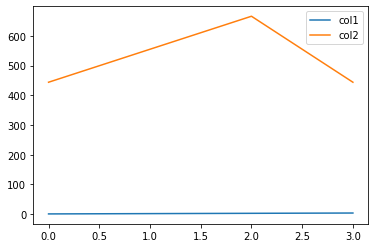

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot()
plt.show()


# Dostęp do danych z pandas

Jedną z najwyraźniejszych zalet pakietu pandas jest posiadanie przygotowanych dla niego funkcji pozwalających na odczytywanie i zapisywanie danych do wielu źródeł. 

## CSV

Najprostszym przykładem do składowania danych jest format csv. Aby wczytać dane z pliku csv wystarczy wywołać następującą składnię

```python
import pandas as pd

plik = 'sciezka/do/pliku.csv'
zmienna = pd.read_csv(plik) 
```

Jeśli nasz plik nie jest idealnie zgodny z domyślnym formatem CSV możemy ręcznie ustawić niezbędne pola jak np. separator pól czy separator dziesiętny.
Więcej detali o funkcji w [linku](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

Ponadto chcąc potem zapisać nasz plik wykonujemy następującą komendę

```python
plik_docelowy = 'sciezka/do/zapisu.csv
zmienna.to_csv(plik_docelowy)
```

In [ ]:
pass

In [ ]:
pass

## EXCEL

Najprostszym przykładem do składowania danych jest format csv. Aby wczytać dane z pliku csv wystarczy wywołać następującą składnię

```python
import pandas as pd

plik = 'sciezka/do/pliku.xlsx'
zmienna = pd.read_excel(plik) 
```

Ta forma odczytu izapisu przeznaczona jest jednak tylko pojedynczego arkusza w pliku excela. Co w przypadku gdy chcemy pracować z wieloma

```{}
import pandas as pd

plik = 'sciezka/do/pliku.xlsx'
arkusz = 'sheet 1'
zmienna = pd.read_excel(plik, sheet_name=arkusz) 
```

Zatem aby wczytać wiele arkuszy naraz 

```{}
import pandas as pd

plik = 'sciezka/do/pliku.xlsx'
arkusz1 = pd.read_excel(plik,sheet_name=0)
arkusz2 = pd.read_excel(plik,sheet_name=1)
```

I jeszcze ciut trudniej w zapisie

```{}
plik_docelowy = 'sciezka/do/zapisu.xlsx
with pd.ExcelWriter(plik_docelowy) as writer:
  arkusz1.to_excel(writer,sheet_name=0)
  arkusz2.to_excel(writer,sheet_name=1)
```

# Grupowanie danych



In [ ]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df


,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [ ]:
df['Person and Sales'] = df[['Sales','Person']].apply(tuple, axis = 1)
df

,Company,Person,Sales,Person and Sales
0,GOOG,Sam,200,"(200, Sam)"
1,GOOG,Charlie,120,"(120, Charlie)"
2,MSFT,Amy,340,"(340, Amy)"
3,MSFT,Vanessa,124,"(124, Vanessa)"
4,FB,Carl,243,"(243, Carl)"
5,FB,Sarah,350,"(350, Sarah)"


In [ ]:
df.drop('Person', axis= 1).groupby('Company').agg(lambda x : max(x)[1])

,Person and Sales
Company,
FB,Sarah
GOOG,Sam
MSFT,Amy


In [ ]:
# df.groupby('Company').agg(lambda x : ''.join([str(i) for i in x ]) )
def aggr(x):
    print(x)
    return None, 1 , 2, 3
df.groupby('Company').agg(aggr ) # specjalnie dla Pani Karoliny !!

4     Carl
5    Sarah
Name: Person, dtype: object
0        Sam
1    Charlie
Name: Person, dtype: object
2        Amy
3    Vanessa
Name: Person, dtype: object
4    243
5    350
Name: Sales, dtype: int64
0    200
1    120
Name: Sales, dtype: int64
2    340
3    124
Name: Sales, dtype: int64


,Person,Sales
Company,,
FB,"(None, 1, 2, 3)","(None, 1, 2, 3)"
GOOG,"(None, 1, 2, 3)","(None, 1, 2, 3)"
MSFT,"(None, 1, 2, 3)","(None, 1, 2, 3)"


In [ ]:
df.groupby('Company').mean()


,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [ ]:
df.groupby('Company').min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [ ]:
df.groupby('Company').count()


,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [ ]:
df.groupby('Company').describe()


Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

# Łączenie ramek danych

Ostatnim tematem dotyczącym jedynie Pandas będzie możliwośc łączenia w różny sposób ramek danych. I tak występują w Pandas trzy rodzaje złączeń danych. Ich kolejne wersje mają swoje najlepsze interpretacje w ujęciu języka SQL

1. Konkatenacja danych - albo Union SQL - połączenie danych zgodnych pod względem kolumn
1. Merge - albo Join SQL - połączenie danych względem niekluczowej kolumny
1. Join - albo Join SQL - połączenie danych względem kluczowej kolumny

## Konkatenacja

In [ ]:
df1 = pd.DataFrame({'col1':[1,2,3,4],
                   'col2':[444,555,666,444],
                   'col3':['abc','def','ghi','xhz']})

df2 = pd.DataFrame({'col1':[5,6,7,8],
                   'col2':[111,222,333,888],
                   'col3':['abc','def','ghi','xhz']})

In [ ]:
df1

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xhz


In [ ]:
df2

,col1,col2,col3
0,5,111,abc
1,6,222,def
2,7,333,ghi
3,8,888,xhz


In [ ]:
df11= pd.concat([df1,df2])
df11

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xhz
0,5,111,abc
1,6,222,def
2,7,333,ghi
3,8,888,xhz


In [ ]:
df12 = df11.reset_index().drop('index', axis = 1)
df12

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xhz
4,5,111,abc
5,6,222,def
6,7,333,ghi
7,8,888,xhz


In [ ]:
df12 = df11.reset_index().reset_index()
df12

,level_0,index,col1,col2,col3
0,0,0,1,444,abc
1,1,1,2,555,def
2,2,2,3,666,ghi
3,3,3,4,444,xhz
4,4,0,5,111,abc
5,5,1,6,222,def
6,6,2,7,333,ghi
7,7,3,8,888,xhz


## Merge



In [ ]:
df1 = pd.DataFrame({'col1':[1,2,3,4],
                   'col2':[444,555,666,444],
                   'col3':['abc','def','ghi','xhz']})

df2 = pd.DataFrame({'col1':[1,6,3,8],
                   'col4':[111,222,333,888],
                   'col5':['abc','def','ghi','xhz']})

In [ ]:
df1

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xhz


In [ ]:
df2

,col1,col4,col5
0,1,111,abc
1,6,222,def
2,3,333,ghi
3,8,888,xhz


In [ ]:
df1.merge(df2, on= 'col1', how = 'inner') #inner join, right, left, outer, cross

,col1,col2,col3,col4,col5
0,1,444,abc,111,abc
1,3,666,ghi,333,ghi


Ćwiczenie domowe dla Pani Karoliny - sprawdzić jak to jest z tą kolejnością.

Dodatkowo wyjaśniając - skoro merge odpowiada JOIN z SQL to czy jest sposób na wywoływanie go w różnych wersjach lewy, prawy, zewnętrzny, etc.

Tak - można to osiągnąć przesyłając dodatkowy parametr
```python
how : {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘inner’
```

In [ ]:
df1.merge(df2, on='col1', how='outer')

,col1,col2,col3,col4,col5
0,1,444.0,abc,111.0,abc
1,2,555.0,def,NaN,NaN
2,3,666.0,ghi,333.0,ghi
3,4,444.0,xhz,NaN,NaN
4,6,NaN,NaN,222.0,def
5,8,NaN,NaN,888.0,xhz


## JOIN

Najpierw uprzedźmy nasze złączenie i wprowadźmy do danych indexy

In [ ]:
df1

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xhz


In [ ]:
df2

,col1,col4,col5
0,1,111,abc
1,6,222,def
2,3,333,ghi
3,8,888,xhz


In [ ]:
df1_ind = df1.set_index('col1')
df2_ind = df2.set_index('col1')

In [ ]:
df1_ind

,col2,col3
col1,,
1,444,abc
2,555,def
3,666,ghi
4,444,xhz


In [ ]:
df2_ind

,col4,col5
col1,,
1,111,abc
6,222,def
3,333,ghi
8,888,xhz


In [ ]:
df1_ind.join(df2_ind, how='inner')

,col2,col3,col4,col5
col1,,,,
1,444,abc,111,abc
3,666,ghi,333,ghi


# Zadania

## Zadanie 1
Importuj bibliotekę pandas

In [ ]:
import pandas as pd

## Zadanie 2

Wczytaj plik bank.csv


In [ ]:
df = pd.read_csv('bank.csv')

## Zadanie 3

Wyświetl 10 pierwszy wierszy zbioru danych


In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Zadanie 4

Jaka jest średnia wieku ludzi w naszym zbiorze danych?

In [ ]:
df['age'].mean()

41.17009511170095

## Zadanie 5

Jaki jest stan cywilny najmłodszej osoby w zbiorze danych?


[podpowiedź](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df['marital'][df['age'] == df['age'].min()].value_counts().idxmax()

'single'

## Zadanie 6

Ile jest unikatowych kategorii zawodów?


In [ ]:
df['job'].nunique()

12

In [ ]:
pd.unique(df['job']).shape[0]

12

In [ ]:
df.values.shape

(4521, 17)

In [ ]:
x = df['job'].unique
x().shape[0]

12

## Zadanie 7

Ile ludzi przynależy do każdej kategorii zawodów?


In [ ]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [ ]:
df.groupby('job')['job'].count()

job
admin.           478
blue-collar      946
entrepreneur     168
housemaid        112
management       969
retired          230
self-employed    183
services         417
student           84
technician       768
unemployed       128
unknown           38
Name: job, dtype: int64

## Zadanie 8

Ile procent ludzi w zbiorze danych jest w małżeństwie?

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
len(df[df['marital'] == 'married']) / len(df) * 100

61.86684361866843

## Zadanie 9

Odszukaj kolumnę "default". Utwórz nową kolumnę o nazwie "default code" która zawiera 0 gdy w default była wartośc neatywna oraz 1 gdy była pozytywna. Wyświetl nagłówek ramki z nowymi danymi. 


In [ ]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['default code'] = df['default'].map({ 'no' : 0 , 'yes' : 1})
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default code
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,0
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,0
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,0
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,0
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,0


In [ ]:
df['default code'].unique()

array([0, 1])

In [ ]:
columns = df.columns.values.tolist()
columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'default code']

In [ ]:
cn = columns[-1]
columns.pop(-1)

columns.insert(5, cn)
columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'default code',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [ ]:
df2 = df.reindex(columns = columns)
df3 = df[columns]
df3

,age,job,marital,education,default,default code,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,0,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Zadanie 10

Korzystając z funkcji apply utwórz nową kolumnę 'marital code', gdzie wartości będą następujące

* m - dla married;
* s - dla single;
* d - dla divorced;
* w - dla widowed;
* itd.

Spróbuj użyć wyrażenia lambda do wykonania zadania



In [ ]:
df['marital code'] = df['marital'].apply(lambda x: x[:1] )
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default code,marital code
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,m
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,m
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,s
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,m
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,m


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default code,marital code
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,m
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,m
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,s
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,m
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0,m
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,1,m
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0,m
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0,m


## Zadanie 11

Ile wynosi największa wartość 'duration'?

## Zadanie 12

Pośród osób niezatrudnionych jaki jest najbardziej powszechny poziom wykształcenia

## Zadanie 13

Jaki jest średni wiek osób niezatrudnionych?

